In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
# this written to run cv2
import sys
sys.path.append('E:\\myenv\\Lib\\site-packages')

In [3]:
X_train = np.loadtxt('E:\\features & labels FFT\\FFT_1000_features.csv', delimiter = ',')
Y_train = np.loadtxt('E:\\features & labels FFT\\FFT_1000_lables.csv', delimiter = ',')
X_test = np.loadtxt('E:\\features & labels FFT\\FFT_300_features.csv', delimiter = ',')
Y_test = np.loadtxt('E:\\features & labels FFT\\FFT_300_lables.csv', delimiter = ',')

In [4]:
import cv2
import numpy as np

X_train = np.loadtxt('E:\\features & labels FFT\\FFT_1000_features.csv', delimiter = ',')
Y_train = np.loadtxt('E:\\features & labels FFT\\FFT_1000_lables.csv', delimiter = ',')
X_test = np.loadtxt('E:\\features & labels FFT\\FFT_300_features.csv', delimiter = ',')
Y_test = np.loadtxt('E:\\features & labels FFT\\FFT_300_lables.csv', delimiter = ',')
# Resize the images to the desired size
X_train_resized = []
for img in X_train:
    img_resized = cv2.resize(img, (100, 100))
    X_train_resized.append(img_resized)
X_train_resized = np.array(X_train_resized)

X_test_resized = []
for img in X_test:
    img_resized = cv2.resize(img, (100, 100))
    X_test_resized.append(img_resized)
X_test_resized = np.array(X_test_resized)

# Stack the grayscale images to create 3-channel images
X_train = np.stack([X_train_resized]*3, axis=-1)
X_test = np.stack([X_test_resized]*3, axis=-1)

# Reshape the input data to match the required input shape for the model
Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
print(X_train.shape)

(1000, 100, 100, 3)


In [6]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (1000, 100, 100, 3)
Shape of Y_train:  (1000, 1)
Shape of X_test:  (300, 100, 100, 3)
Shape of Y_test:  (300, 1)


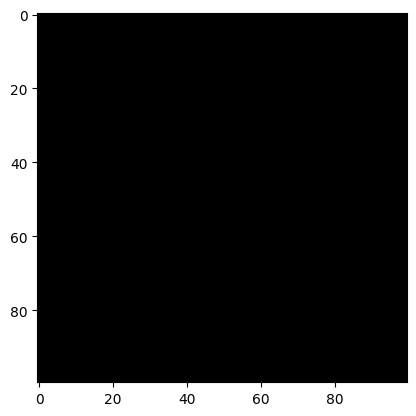

In [8]:
import random
import matplotlib.pyplot as plt

# Assuming X_train is the dataset containing images

# Choose a random index from the training set
idx = random.randint(0, len(X_train))

# Normalize the image data to the [0, 1] range
normalized_image = X_train[idx] / 255.0  # Assuming pixel values are in [0, 255] range

# Clip the values to the valid range [0, 1]
normalized_image = np.clip(normalized_image, 0.0, 1.0)

# Display the normalized image
plt.imshow(normalized_image)
plt.show()


# Model SVC

In [12]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Suppress relevant warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Train a Support Vector Classifier (SVC) for 5 epochs
num_epochs = 5
for epoch in range(1, num_epochs + 1):
    # Train the model
    svm = SVC()
    svm.fit(X_train, Y_train)
    
    # Predict on the test set
    Y_pred = svm.predict(X_test)
    
    # Calculate accuracy for this epoch
    accuracy = accuracy_score(Y_test, Y_pred)
    
    # Print the results in the desired format
    print(f"Epoch {epoch}/{num_epochs}")
    print(f"Accuracy after Epoch {epoch}: {accuracy:.4f}\n")


Epoch 1/5
Accuracy after Epoch 1: 0.9806

Epoch 2/5
Accuracy after Epoch 2: 0.9806

Epoch 3/5
Accuracy after Epoch 3: 0.9806

Epoch 4/5
Accuracy after Epoch 4: 0.9806

Epoch 5/5
Accuracy after Epoch 5: 0.9806



In [9]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Suppress relevant warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Train a Support Vector Classifier (SVC) for 5 epochs
num_epochs = 5
for epoch in range(1, num_epochs + 1):
    # Train the model
    svm = SVC()
    svm.fit(X_train, Y_train)
    
    # Predict on the test set
    Y_pred = svm.predict(X_test)
    
    # Calculate accuracy for this epoch
    accuracy = accuracy_score(Y_test, Y_pred)
    
    # Calculate precision, recall, and F1-score for each class
    precision, recall, f1, _ = precision_recall_fscore_support(Y_test, Y_pred, average=None)
    
    # Print the results in the desired format
    print(f"Epoch {epoch}/{num_epochs}")
    print(f"Accuracy after Epoch {epoch}: {accuracy:.4f}")
    print("Class-wise metrics:")
    for i in range(len(precision)):
        print(f"Class {i} - Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}, F1-score: {f1[i]:.4f}")
    print()


Epoch 1/5
Accuracy after Epoch 1: 0.9806
Class-wise metrics:
Class 0 - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Class 1 - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Class 2 - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Class 3 - Precision: 1.0000, Recall: 0.9706, F1-score: 0.9851
Class 4 - Precision: 0.9583, Recall: 1.0000, F1-score: 0.9787
Class 5 - Precision: 0.9583, Recall: 0.9787, F1-score: 0.9684
Class 6 - Precision: 0.9722, Recall: 1.0000, F1-score: 0.9859
Class 7 - Precision: 1.0000, Recall: 0.9412, F1-score: 0.9697
Class 8 - Precision: 0.9667, Recall: 0.9667, F1-score: 0.9667
Class 9 - Precision: 0.9744, Recall: 0.9500, F1-score: 0.9620

Epoch 2/5
Accuracy after Epoch 2: 0.9806
Class-wise metrics:
Class 0 - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Class 1 - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Class 2 - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Class 3 - Precision: 1.0000, Recall: 0.9706, F1-score: 0.9851
Class 4 -

# Making predictions


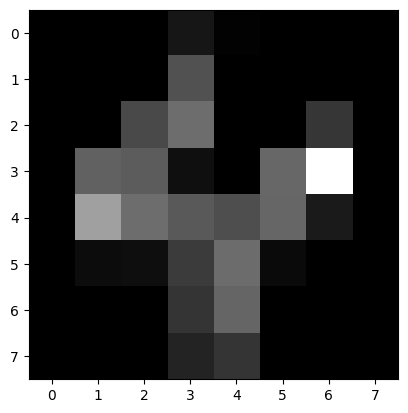

Our model says that it is a: tumor


In [13]:
import random
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Assuming svc_classifier is the trained SVC classifier

# Choose a random index from the test set
idx2 = random.randint(0, len(Y_test))

# Normalize the image data to the [0, 1] range
normalized_image = X_test[idx2, :] / 255.0  # Assuming pixel values are in [0, 255] range

# Clip the values to the valid range [0, 1]
normalized_image = np.clip(normalized_image, 0.0, 1.0)

# Display the normalized image
plt.imshow(normalized_image.reshape(8, 8), cmap='gray')  # Assuming the original shape is (8, 8)
plt.show()

# Predict using the SVC model
y_pred = svm.predict(normalized_image.reshape(1, -1))

if y_pred == 0:
    pred = 'no tumor'
else:
    pred = 'tumor'

print("Our model says that it is a:", pred)
